In [29]:
#Import python packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from matplotlib.cm import rainbow

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("numeric_heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#Display basic statistics of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#Separate Feature and Target Matrix
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


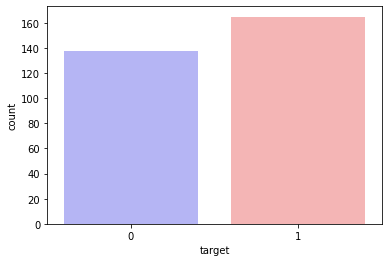

In [32]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [23]:
col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled= s_scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [24]:
# Split Data to Train and Test
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(227, 13)
(76, 13)


# Linear Kernel

In [93]:
#Create a svm Classifier
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(x_test)

# Getting the score 
ml.score (x_test, y_test)

print("Train Linear Accuracy:", ml.score(x_train, y_train))
print("Test Linear Accuracy:", ml.score(x_test, y_test))

Train Linear Accuracy: 0.8590308370044053
Test Linear Accuracy: 0.8289473684210527


In [30]:
# Printing classification report (since there was biasness in target labels)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.89      0.78      0.83        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



<AxesSubplot:>

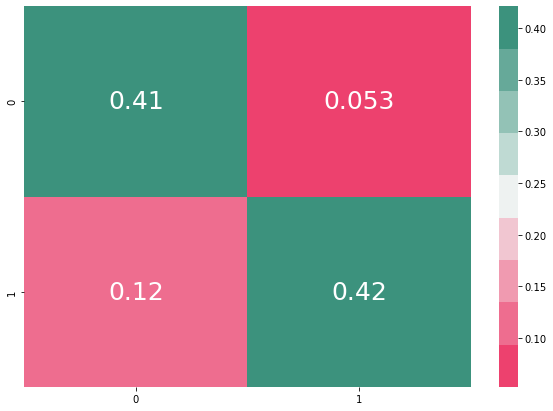

In [31]:
# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

# RBF Kernel
Kernel RBF is the default kernel and is the best kernel for non-linearity.
## What is the Best Non linear kernel and Best value for gamma and C?
The non linear kernel are sigmoid, poly and rbf. Among these kernels, rbf is the best kernel.

### grid search finds the set which gives the better parameters  of Gamma and C.
grid search also finds the best degree for poly kernel also as follows:
svm.SVC(kernel='poly', degree=[2,4,6])

You just need to import GridSearchCV from sklearn.grid_search, setup a parameter grid (using multiples of 10’s is a good place to start) and then pass the algorithm, parameter grid and number of cross validations to the GridSearchCV method.

In [90]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
    gammas = [0.001, 0.01, 0.1, 1]
    
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [91]:
# param_grid = {'C': [0.1,1, 10, 100], 
#               'gamma': [1,0.1,0.01,0.001],
#               'kernel': ['rbf', 'poly', 'sigmoid']}
svc_param_selection(x_train,y_train, 10)

{'C': 10, 'gamma': 0.001}

In [81]:
svm_grid = svm.SVC(**svc_param_selection(x_train,y_train, 10))
svm_grid.fit(x_train, y_train)
print("Train grid Accuracy:", svm_grid.score(x_train, y_train))
print("Test grid Accuracy:", svm_grid.score(x_test, y_test))

Train grid Accuracy: 0.8458149779735683
Test grid Accuracy: 0.8026315789473685


In [83]:
grid_predictions = svm_grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

[[27  8]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.81      0.83      0.82        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



<AxesSubplot:>

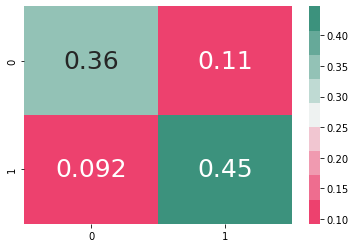

In [92]:
cf_matrix = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

# What is the Best Kernel? Linear or Non-Linear

In [111]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

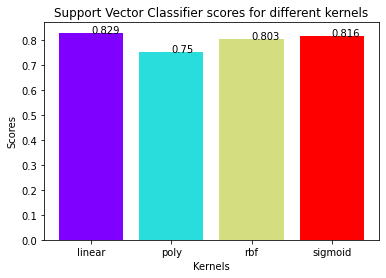

In [112]:


colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
#     value = "{:,}".format(svc_scores[i])
    plt.text(i, round(svc_scores[i],3), round(svc_scores[i],3))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

From the above, we can see the linear kernel gives us better accuracy. So, we choose the linear kerne results.